# Sigma-Delta Modulator design exploration

In [1]:
%pip install git+https://github.com/hammal/cbadc.git@feature/0.4.0

# import necessary libraries:
import numpy as np
import cbadc as cb
import matplotlib.pyplot as plt

  Cloning https://github.com/hammal/cbadc.git (to revision feature/0.4.0) to c:\users\frang\appdata\local\temp\pip-req-build-3d5v7eds
  Resolved https://github.com/hammal/cbadc.git to commit e5cc310faf08525bd7238c6bb4dcc5bb4c37540e
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached deltasigma-0.2.6-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/hammal/cbadc.git 'C:\Users\frang\AppData\Local\Temp\pip-req-build-3d5v7eds'
  Running command git checkout -b feature/0.4.0 --track origin/feature/0.4.0
  branch 'feature/0.4.0' set up to track 'origin/feature/0.4.0'.
  Switched to a new branch 'feature/0.4.0'

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\frang\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
# defining base model parameters:
order = 3 # modulator order
osr = 32 # oversampling ratio
nlev = 2 # number of DAC levels
f0 = 0. # input frequency (0 for baseband)
Hinf = 1.5 # feedback gain
tdac = [0, 1] # DAC sampling times
form = "FB" # modulator architecture (feedback)
dt_form = "CRFB" # time-domain structure
Bw = 10e6 # bandwidth of interest

# compute the sampling frequency:
fs = Bw * osr * 2  
print(f"Sampling frequency: {fs / 1e6} MHz")

Sampling frequency: 640.0 MHz


In [3]:
# synthesize the Noise Transfer Function (NTF):
ntf0 = cb.delsig.synthesizeNTF(order, osr, 2, Hinf, f0)
ntf0

ZerosPolesGainContinuous(
array([1.        +0.j        , 0.99710991+0.07597258j,
       0.99710991-0.07597258j]),
array([0.76451463-0.28005205j, 0.76451463+0.28005205j,
       0.66846015+0.j        ]),
1,
dt: None
)

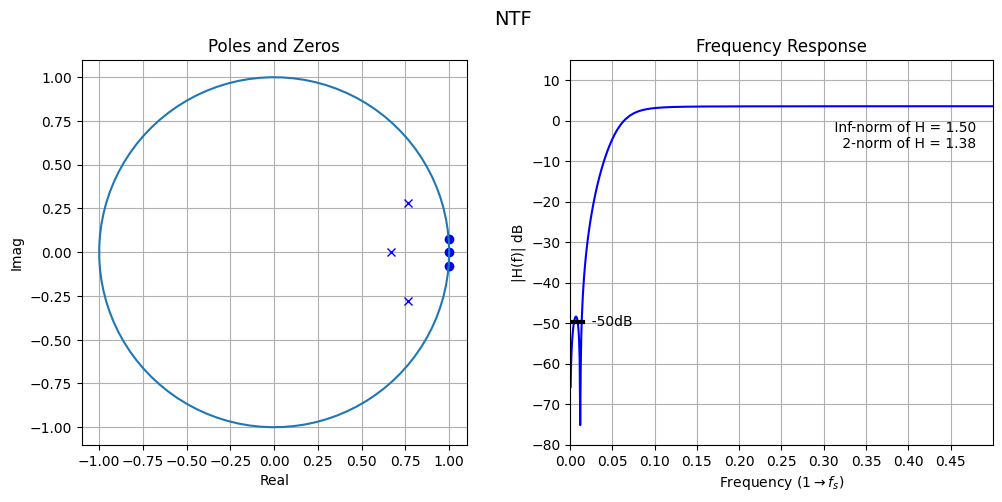

In [4]:
# visualize poles and zeros of the NTF:
cb.delsig.DocumentNTF(ntf0, osr, f0, False)

In [5]:
# realize the NTF in state-space representation:
a, g, b, c = cb.delsig.realizeNTF(ntf0, form="CRFB")
ABCD = cb.delsig.stuffABCD(a, g, b, c)

In [6]:
# create discrete-time analog frontend model:
dt_analog_frontend = cb.AnalogFrontend.dtsdm(ABCD, nlev)
print(dt_analog_frontend)

AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.        ]
 [ 1.          1.         -0.00578018]
 [ 1.          1.          0.99421982]],
B=
[[ 0.04438739 -0.04438739]
 [ 0.2398605  -0.2398605 ]
 [ 0.7967304  -0.7967304 ]],
C=
[[0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=3,
L=1,
M=1,
dt=1.0
)


In [7]:
# run an initial SNR simulation as a baseline:
snr_base, amp_base, _ = dt_analog_frontend.simulateSNR(osr)

INFO:root:Simulating discrete-time analog frontend


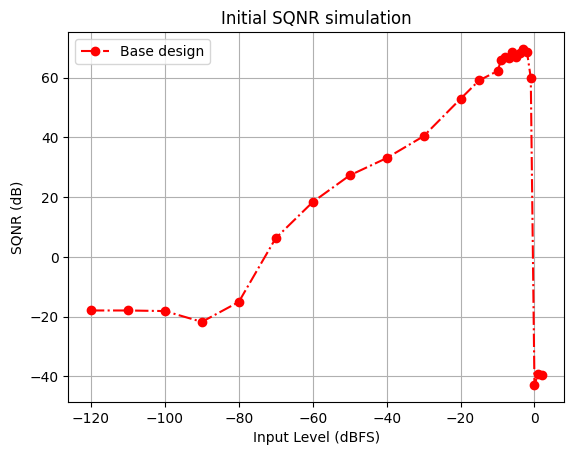

In [8]:
# plot the initial SQNR results:
plt.figure()
plt.plot(amp_base, snr_base, 'o-.r', label='Base design')
plt.xlabel('Input Level (dBFS)')
plt.ylabel('SQNR (dB)')
plt.title('Initial SQNR simulation')
plt.grid()
plt.legend()
plt.show()

## Effect of varying the modulator order

INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 640.0 MHz


###################################
Testing modulator order: 2
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1. -0.]
 [ 1.  1.]],
B=
[[ 0.21637021 -0.21637021]
 [ 0.77485177 -0.77485177]],
C=
[[0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=2,
L=1,
M=1,
dt=1.0
)


INFO:root:Simulating discrete-time analog frontend






###################################
Testing modulator order: 3
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.        ]
 [ 1.          1.         -0.00578018]
 [ 1.          1.          0.99421982]],
B=
[[ 0.04438739 -0.04438739]
 [ 0.2398605  -0.2398605 ]
 [ 0.7967304  -0.7967304 ]],
C=
[[0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=3,
L=1,
M=1,
dt=1.0
)


INFO:root:Simulating discrete-time analog frontend






###################################
Testing modulator order: 4
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.         -0.          0.          0.        ]
 [ 1.          1.          0.          0.        ]
 [ 0.          1.          1.         -0.00688054]
 [ 0.          1.          1.          0.99311946]],
B=
[[ 0.00623566 -0.00623566]
 [ 0.05924456 -0.05924456]
 [ 0.24493638 -0.24493638]
 [ 0.80201979 -0.80201979]],
C=
[[0. 0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=4,
L=1,
M=1,
dt=1.0
)


INFO:root:Simulating discrete-time analog frontend






###################################
Testing modulator order: 5
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.          0.          0.        ]
 [ 1.          1.         -0.00279396  0.          0.        ]
 [ 1.          1.          0.99720604  0.          0.        ]
 [ 0.          0.          1.          1.         -0.00790937]
 [ 0.          0.          1.          1.          0.99209063]],
B=
[[ 6.75559806e-04 -6.75559806e-04]
 [ 8.37752565e-03 -8.37752565e-03]
 [ 6.33294166e-02 -6.33294166e-02]
 [ 2.44344030e-01 -2.44344030e-01]
 [ 8.02273699e-01 -8.02273699e-01]],
C=
[[0. 0. 0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=5,
L=1,
M=1,
dt=1.0
)


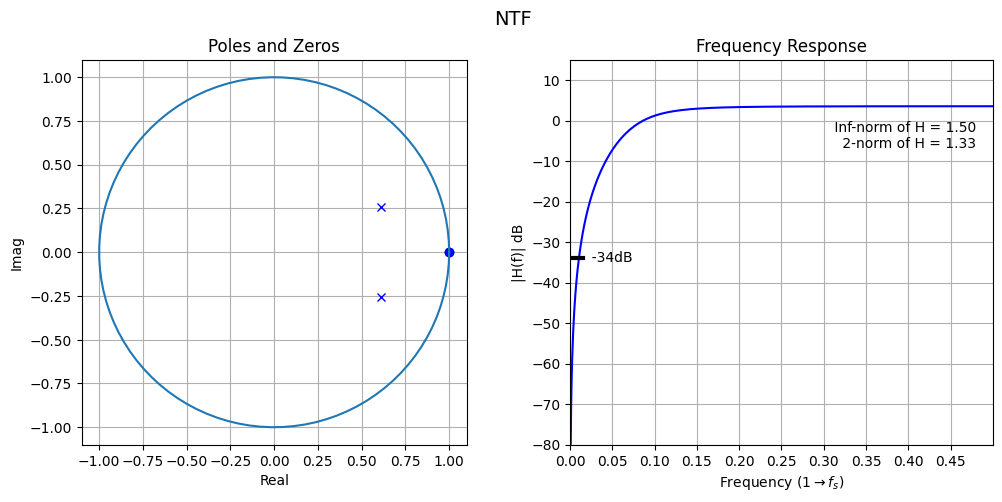

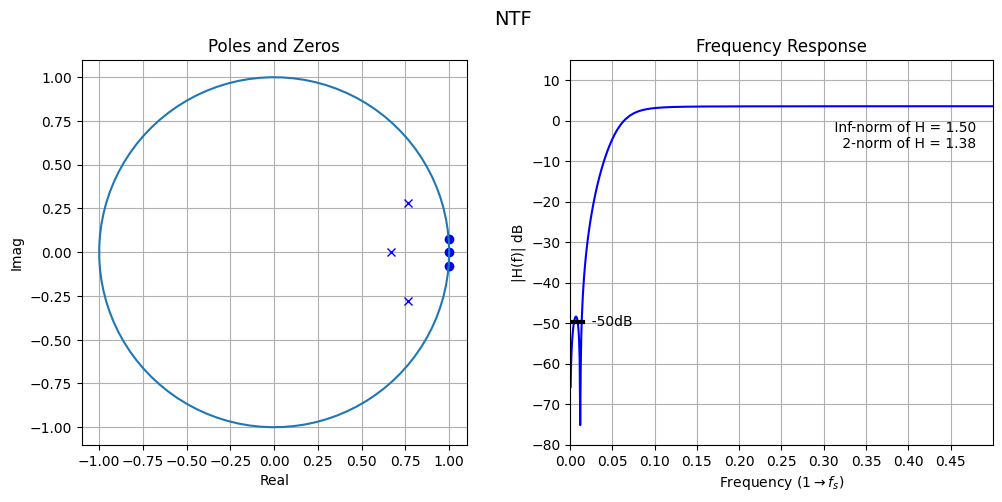

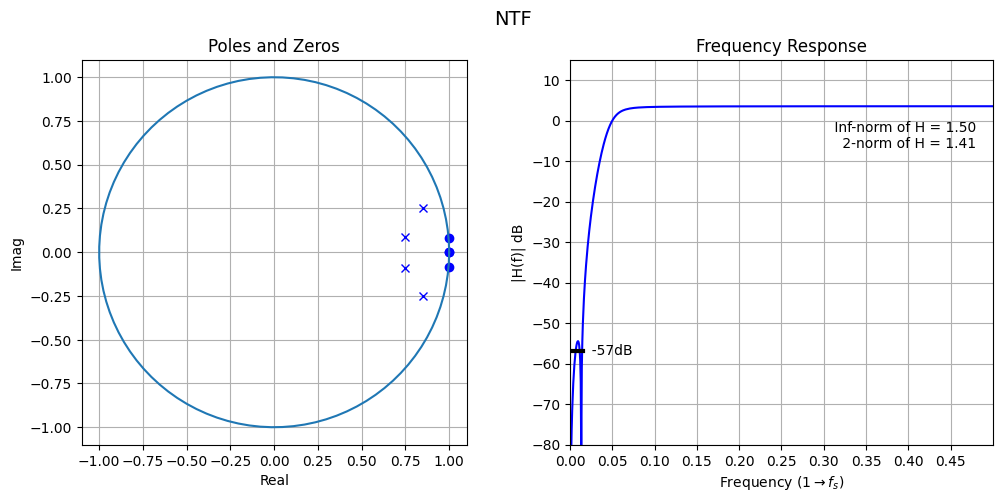

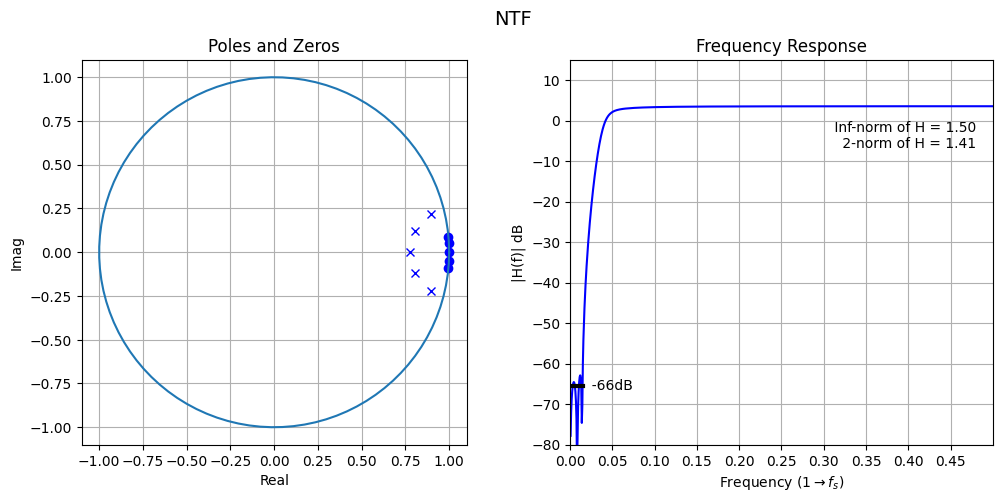

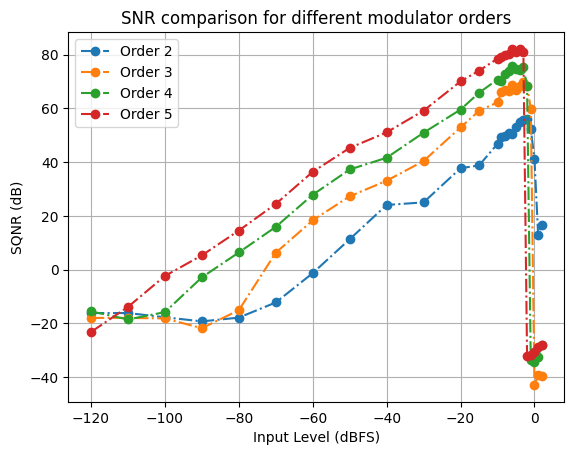

In [9]:
# defining base model parameters:
osr = 32 # oversampling ratio
nlev = 2 # number of DAC levels
f0 = 0. # input frequency (0 for baseband)
Hinf = 1.5 # feedback gain
tdac = [0, 1] # DAC sampling times
form = "FB" # modulator architecture (feedback)
dt_form = "CRFB" # time-domain structure
Bw = 10e6 # bandwidth of interest

# compute the sampling frequency:
fs = Bw * osr * 2  
print(f"Sampling frequency: {fs / 1e6} MHz\n\n")

# explore different modulator orders:
orders = [2, 3, 4, 5]
snr_results_order = {}

for order in orders:
    print("###################################")
    print(f"Testing modulator order: {order}")
    print("###################################")
    
    # synthesize the Noise Transfer Function (NTF):
    ntf = cb.delsig.synthesizeNTF(order, osr, 2, Hinf, f0)
    
    # visualize poles and zeros of the NTF:
    cb.delsig.DocumentNTF(ntf, osr, f0, False)
    
    # realize the NTF in state-space representation:
    a, g, b, c = cb.delsig.realizeNTF(ntf, form="CRFB")
    ABCD = cb.delsig.stuffABCD(a, g, b, c)
    
    # create discrete-time analog frontend model:
    dt_analog_frontend = cb.AnalogFrontend.dtsdm(ABCD, nlev)
    print(dt_analog_frontend)
    
    # run an SNR simulation:
    snr, amp, _ = dt_analog_frontend.simulateSNR(osr)
    snr_results_order[order] = (amp, snr)
    
    print("\n\n======================================================================\n\n")

# plot the SNR comparison:
plt.figure()
for order, (amp, snr) in snr_results_order.items():
    plt.plot(amp, snr, 'o-.', label=f'Order {order}')
plt.xlabel('Input Level (dBFS)')
plt.ylabel('SQNR (dB)')
plt.title('SNR comparison for different modulator orders')
plt.grid()
plt.legend()
plt.show()

## Effect of varying the oversampling ratio

INFO:root:Simulating discrete-time analog frontend


###################################
Testing OSR: 16
###################################

Sampling Frequency: 320.0 MHz



INFO:root:Simulating discrete-time analog frontend






###################################
Testing OSR: 32
###################################

Sampling Frequency: 640.0 MHz



INFO:root:Simulating discrete-time analog frontend






###################################
Testing OSR: 64
###################################

Sampling Frequency: 1280.0 MHz



INFO:root:Simulating discrete-time analog frontend






###################################
Testing OSR: 128
###################################

Sampling Frequency: 2560.0 MHz



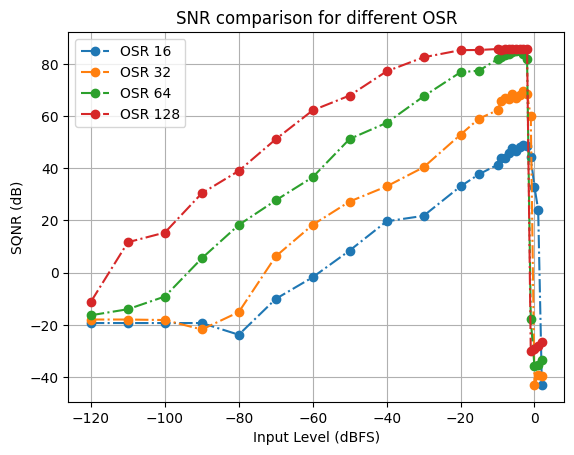

In [10]:
# defining base model parameters:
order = 3 # modulator order
nlev = 2 # number of DAC levels
f0 = 0. # input frequency (0 for baseband)
Hinf = 1.5 # feedback gain
tdac = [0, 1] # DAC sampling times
form = "FB" # modulator architecture (feedback)
dt_form = "CRFB" # time-domain structure
Bw = 10e6 # bandwidth of interest

# explore different OSR:
osr_values = [16, 32, 64, 128]
snr_results_osr = {}

for osr in osr_values:
    print("###################################")
    print(f"Testing OSR: {osr}")
    print("###################################")
    
    # compute the sampling frequency:
    fs = Bw * osr * 2
    print(f"\nSampling Frequency: {fs / 1e6} MHz\n")
    
    # synthesize the Noise Transfer Function (NTF):
    ntf = cb.delsig.synthesizeNTF(order, osr, 2, Hinf, f0)

    # realize the NTF in state-space representation:
    a, g, b, c = cb.delsig.realizeNTF(ntf, form="CRFB")
    ABCD = cb.delsig.stuffABCD(a, g, b, c)

    # create discrete-time analog frontend model:
    dt_analog_frontend = cb.AnalogFrontend.dtsdm(ABCD, nlev)

    # run an SNR simulation:
    snr, amp, _ = dt_analog_frontend.simulateSNR(osr)
    snr_results_osr[osr] = (amp, snr)
    
    print("\n\n======================================================================\n\n")

# plot the SNR comparison:
plt.figure()
for osr, (amp, snr) in snr_results_osr.items():
    plt.plot(amp, snr, 'o-.', label=f'OSR {osr}')
plt.xlabel('Input Level (dBFS)')
plt.ylabel('SQNR (dB)')
plt.title('SNR comparison for different OSR')
plt.grid()
plt.legend()
plt.show()

## Effect of varying the gain of the modulator

INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 640.0 MHz


###################################
Testing Hinf Gain: 1.0
###################################


INFO:root:Simulating discrete-time analog frontend






###################################
Testing Hinf Gain: 1.5
###################################


INFO:root:Simulating discrete-time analog frontend






###################################
Testing Hinf Gain: 2.0
###################################


INFO:root:Simulating discrete-time analog frontend






###################################
Testing Hinf Gain: 2.5
###################################


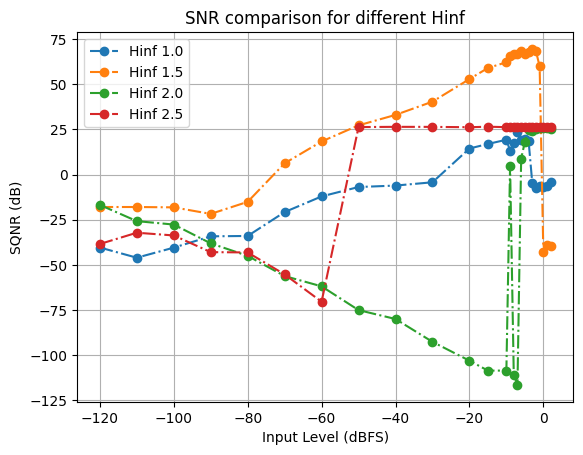

In [11]:
# defining base model parameters:
order = 3 # modulator order
osr = 32 # oversampling ratio
nlev = 2 # number of DAC levels
f0 = 0. # input frequency (0 for baseband)
tdac = [0, 1] # DAC sampling times
form = "FB" # modulator architecture (feedback)
dt_form = "CRFB" # time-domain structure
Bw = 10e6 # bandwidth of interest

# compute the sampling frequency:
fs = Bw * osr * 2  
print(f"Sampling frequency: {fs / 1e6} MHz\n\n")

# explore different Hinf gain values:
Hinf_values = [1.0, 1.5, 2.0, 2.5]
snr_results_hinf = {}

for Hinf in Hinf_values:
    print("###################################")
    print(f"Testing Hinf Gain: {Hinf}")
    print("###################################")
    
    # synthesize the Noise Transfer Function (NTF):
    ntf = cb.delsig.synthesizeNTF(order, osr, 2, Hinf, f0)

    # realize the NTF in state-space representation:
    a, g, b, c = cb.delsig.realizeNTF(ntf, form="CRFB")
    ABCD = cb.delsig.stuffABCD(a, g, b, c)

    # create discrete-time analog frontend model:
    dt_analog_frontend = cb.AnalogFrontend.dtsdm(ABCD, nlev)

    # run an SNR simulation:
    snr, amp, _ = dt_analog_frontend.simulateSNR(osr)
    snr_results_hinf[Hinf] = (amp, snr)
    
    print("\n\n======================================================================\n\n")

# plot the SNR comparison:
plt.figure()
for Hinf, (amp, snr) in snr_results_hinf.items():
    plt.plot(amp, snr, 'o-.', label=f'Hinf {Hinf}')
plt.xlabel('Input Level (dBFS)')
plt.ylabel('SQNR (dB)')
plt.title('SNR comparison for different Hinf')
plt.grid()
plt.legend()
plt.show()

## Effect of varying the form of the modulator

INFO:root:Simulating discrete-time analog frontend


Sampling frequency: 640.0 MHz


###################################
Testing modulator form: CRFB
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.        ]
 [ 1.          1.         -0.00578018]
 [ 1.          1.          0.99421982]],
B=
[[ 0.04438739 -0.04438739]
 [ 0.2398605  -0.2398605 ]
 [ 0.7967304  -0.7967304 ]],
C=
[[0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=3,
L=1,
M=1,
dt=1.0
)


INFO:root:Simulating discrete-time analog frontend






###################################
Testing modulator form: CRFF
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.        ]
 [ 1.          1.         -0.00578018]
 [ 1.          1.          0.99421982]],
B=
[[ 1.         -0.5568699 ]
 [ 0.         -0.2398605 ]
 [ 0.         -0.28102908]],
C=
[[0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=3,
L=1,
M=1,
dt=1.0
)


C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deltasigma\_realizeNTF.py:183: UserWarning: The ntf's zeros have had their real parts set to one.
  warn("The ntf's zeros have had their real parts set to one.")
INFO:root:Simulating discrete-time analog frontend






###################################
Testing modulator form: CIFB
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.        ]
 [ 1.          1.         -0.00577183]
 [ 1.          1.          0.99422817]],
B=
[[ 0.04438739 -0.04438739]
 [ 0.28425624 -0.28425624]
 [ 1.08676683 -1.08676683]],
C=
[[0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=3,
L=1,
M=1,
dt=1.0
)


C:\Users\frang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deltasigma\_realizeNTF.py:205: UserWarning: The ntf's zeros have had their real parts set to one.
  warn("The ntf's zeros have had their real parts set to one.")
INFO:root:Simulating discrete-time analog frontend






###################################
Testing modulator form: CIFF
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.        ]
 [ 1.          1.         -0.00577183]
 [ 1.          1.          0.99422817]],
B=
[[ 1.         -0.80251059]
 [ 0.         -0.28425624]
 [ 0.         -0.32401167]],
C=
[[0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=3,
L=1,
M=1,
dt=1.0
)


INFO:root:Simulating discrete-time analog frontend






###################################
Testing modulator form: CRFBD
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.        ]
 [ 1.          1.         -0.00578018]
 [ 1.          1.          0.99421982]],
B=
[[ 0.04438739 -0.04438739]
 [ 0.2398605  -0.2398605 ]
 [ 1.0365909  -1.0365909 ]],
C=
[[0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=3,
L=1,
M=1,
dt=1.0
)


INFO:root:Simulating discrete-time analog frontend






###################################
Testing modulator form: CRFFD
###################################
AnalogFrontend(
  analog_filter=StateSpace(
A=
[[ 1.          0.          0.        ]
 [ 1.          1.         -0.00578018]
 [ 1.          1.          0.99421982]],
B=
[[ 1.         -0.7967304 ]
 [ 0.         -0.2398605 ]
 [ 0.         -0.27964264]],
C=
[[0. 0. 1.]],
D=
[[1. 0.]]),
)
digital_control=DigitalControl(M=1, dt=1.0, dac_waveform=nrz),
analog_signal=AnalogSignal(offset=[[0.]], L=1, piecewise_constant=True),
state_covariance=None,
output_covariance=None,
N=3,
L=1,
M=1,
dt=1.0
)


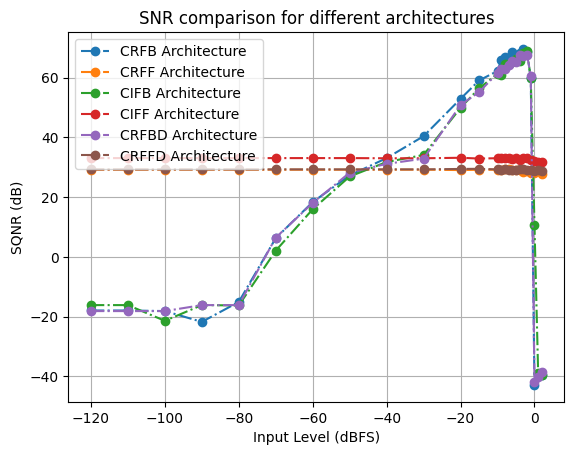

In [12]:
# defining base model parameters:
order = 3 # modulator order
osr = 32 # oversampling ratio
nlev = 2 # number of DAC levels
f0 = 0. # input frequency (0 for baseband)
Hinf = 1.5 # feedback gain
tdac = [0, 1] # DAC sampling times
Bw = 10e6 # bandwidth of interest

# compute the sampling frequency:
fs = Bw * osr * 2  
print(f"Sampling frequency: {fs / 1e6} MHz\n\n")

# explore different forms of the modulator:
forms = ["CRFB", "CRFF", "CIFB", "CIFF", "CRFBD", "CRFFD"]
snr_results_forms = {}

for form in forms:
    print("###################################")
    print(f"Testing modulator form: {form}")
    print("###################################")
    
    # synthesize the Noise Transfer Function (NTF):
    ntf = cb.delsig.synthesizeNTF(order, osr, 2, Hinf, f0)

    # realize the NTF in state-space representation:
    a, g, b, c = cb.delsig.realizeNTF(ntf, form)
    ABCD = cb.delsig.stuffABCD(a, g, b, c)

    # create discrete-time analog frontend model:
    dt_analog_frontend = cb.AnalogFrontend.dtsdm(ABCD, nlev)
    print(dt_analog_frontend)

    # run an SNR simulation:
    snr, amp, _ = dt_analog_frontend.simulateSNR(osr)
    snr_results_forms[form] = (amp, snr)
    
    print("\n\n======================================================================\n\n")

# plot the SNR comparison:
plt.figure()
for form, (amp, snr) in snr_results_forms.items():
    plt.plot(amp, snr, 'o-.', label=f'{form} Architecture')
plt.xlabel('Input Level (dBFS)')
plt.ylabel('SQNR (dB)')
plt.title('SNR comparison for different architectures')
plt.grid()
plt.legend()
plt.show()